In [1]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## NO2 data

In [2]:
# Merged data

root = os.path.dirname(os.path.dirname(os.getcwd()))

df_aq = pd.read_csv(root + "/data/cleaned/air_quality_NO2.csv", index_col=0)[['value','latitude', 'longitude']]
df_met = pd.read_csv(root + "/data/cleaned/nO2_met.csv", index_col=0)
df_fac = pd.read_csv(root + "/data/cleaned/no2_fac_data.csv", index_col=0)
# df_fac.drop(df_fac.columns[df_fac.columns.str.contains('_emsdist')], axis=1, inplace=True)
df_traffic = pd.read_csv(root + "/data/cleaned/intersection_final.csv", index_col=0)

df_m1 = df_aq.merge(df_met, on = ['latitude', 'longitude'], how = 'inner')
df_m2 = df_m1.merge(df_fac, on = ['latitude', 'longitude'], how = 'inner')
df_merged = df_m2.merge(df_traffic, on = ['latitude', 'longitude'], how = 'inner')
df_merged.drop(columns = ['latitude', 'longitude'], inplace=True)

df_merged.head()

,value,prcp,srad,tmax,tmin,vp,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,...,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,0.000517,6.013942,324.280839,26.028285,15.117482,1923.620985,12.680647,3.513275,10.102472,11.024678,...,11.451906,15.257578,9.472873,9.421468,0.312202,7.600228,0.476709,5.838893,0.281697,2
1,0.000756,6.062372,324.512628,26.011606,15.253796,1939.266788,8.356899,5.330996,6.772984,16.444230,...,21.484935,10.711458,13.493317,4.948540,0.594398,3.106107,1.166444,2.154731,0.763344,7
2,0.001427,6.364124,323.496971,25.941131,15.169124,1930.899416,6.544169,6.807678,2.544706,43.767923,...,23.382003,9.573589,15.097065,5.137841,0.572497,7.382055,0.490798,3.860592,0.426049,2
3,0.001262,6.543102,322.899088,25.879489,15.221825,1936.849307,3.680460,12.104628,0.986680,112.880059,...,28.818880,6.593900,21.919214,4.220688,0.696901,7.750279,0.467480,5.608772,0.293255,2
4,0.000803,5.763905,325.528248,25.994635,15.577007,1976.188212,10.323266,4.315553,12.966099,8.589823,...,10.792060,9.541352,15.148073,9.228605,0.318726,7.566826,0.478814,11.333676,0.145125,2


In [3]:
# NO2 data only
df_no2 = pd.read_csv("../../data/cleaned/air_quality_NO2.csv")
df_no2["value_ppb"] = df_no2["value"] * 1000
df_no2.head()

,Unnamed: 0,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,value_ppb
0,0,61509,NaN,Houston,US,2018-03-31T06:00:00+00:00,2018-03-31T01:00:00-05:00,no2,0.000517,ppm,29.789446,-95.483822,0.516563
1,1,61509,NaN,Houston,US,2018-03-31T06:00:00+00:00,2018-03-31T01:00:00-05:00,no2,0.000756,ppm,29.750588,-95.419853,0.755714
2,2,61509,NaN,Houston,US,2018-03-31T06:00:00+00:00,2018-03-31T01:00:00-05:00,no2,0.001427,ppm,29.810590,-95.348540,1.427042
3,3,61509,NaN,Houston,US,2018-03-31T06:00:00+00:00,2018-03-31T01:00:00-05:00,no2,0.001262,ppm,29.786917,-95.298818,1.262063
4,4,61509,NaN,Houston,US,2018-03-31T06:00:00+00:00,2018-03-31T01:00:00-05:00,no2,0.000803,ppm,29.604903,-95.364682,0.802857


In [4]:
# plotting map to compare with EDF study
px.set_mapbox_access_token("pk.eyJ1IjoidmlzaGFsdmpvc2VwaCIsImEiOiJjbDM2Y3hxaTMzYnlsM2JwZmoxZm9sZjZxIn0.ARpv_l4hUbukED2DPkPuxg")
fig = px.scatter_mapbox(df_no2, lat="latitude", lon="longitude", color = "value_ppb", labels = {"value_ppb": "NO2 (ppb)"},
                        color_continuous_scale=px.colors.sequential.Inferno[::-1], size_max=1, zoom=10)
fig.show()

count    11534.000000
mean         0.001059
std          0.000613
min          0.000300
25%          0.000686
50%          0.000911
75%          0.001221
max          0.005345
Name: value, dtype: float64

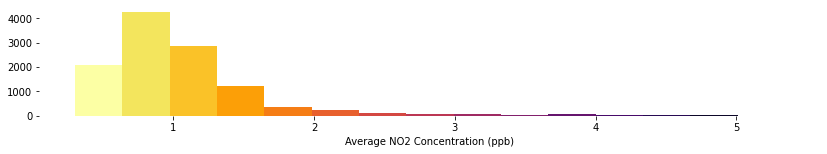

In [43]:
# Stats
display(df_no2.describe()['value'])

# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df_no2["value_ppb"], bins = 15)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

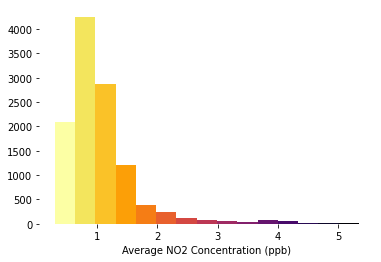

In [47]:
# Histogram Take II (standard size)
fig, ax = plt.subplots()
n, bins, patches = plt.hist(df_no2["value_ppb"], bins = 15)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

## Meteorological data

In [6]:
df_met = pd.read_csv("../../data/cleaned/no2_met.csv")

In [7]:
df_met.head()

,Unnamed: 0,latitude,longitude,prcp,srad,tmax,tmin,vp
0,0,29.789446,-95.483822,6.013942,324.280839,26.028285,15.117482,1923.620985
1,1,29.791588,-95.481751,6.013942,324.280839,26.028285,15.117482,1923.620985
2,2,29.789405,-95.483061,6.013942,324.280839,26.028285,15.117482,1923.620985
3,3,29.794780,-95.477146,6.013942,324.280839,26.028285,15.117482,1923.620985
4,4,29.792618,-95.480138,6.013942,324.280839,26.028285,15.117482,1923.620985


In [8]:
df_met.count()

Unnamed: 0    11534
latitude      11534
longitude     11534
prcp          11534
srad          11534
tmax          11534
tmin          11534
vp            11534
dtype: int64

Avg Daily Precipitation


count    11534.000000
mean         6.161217
std          0.310194
min          5.670803
25%          5.942007
50%          6.202847
75%          6.437336
max          6.779051
Name: prcp, dtype: float64

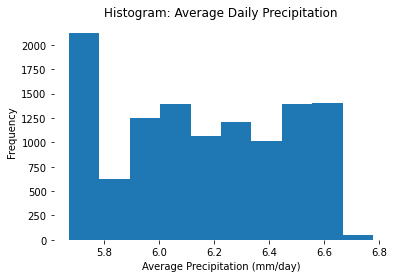

In [48]:
# Precipitation: 
# Descriptive stats
print("Avg Daily Precipitation")
display(df_met.describe()['prcp'])

# Histogram
fig, ax = plt.subplots()
df_met["prcp"].plot(kind = "hist")
ax.set_title("Histogram: Average Daily Precipitation")
ax.set_xlabel("Average Precipitation (mm/day)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

Avg Daily Maximum Temperature


count    11534.000000
mean        25.975586
std          0.101141
min         25.749343
25%         25.877482
50%         25.983613
75%         26.040912
max         26.146715
Name: tmax, dtype: float64

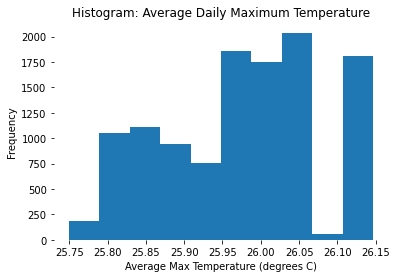

In [49]:
# Temperature: 
# Descriptive stats
## tmax
print("Avg Daily Maximum Temperature")
display(df_met.describe()['tmax'])
# Histogram
fig, ax = plt.subplots()
df_met["tmax"].plot(kind = "hist")
ax.set_title("Histogram: Average Daily Maximum Temperature")
ax.set_xlabel("Average Max Temperature (degrees C)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

Avg Daily Minimum Temperature


count    11534.000000
mean        15.313404
std          0.131956
min         15.095985
25%         15.228723
50%         15.283431
75%         15.369088
max         15.622591
Name: tmin, dtype: float64

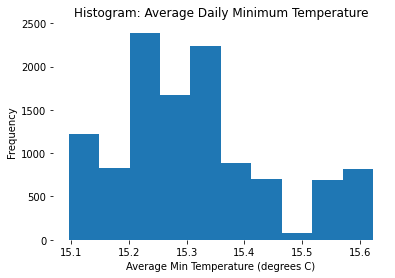

In [50]:
## tmin
print("Avg Daily Minimum Temperature")
display(df_met.describe()['tmin'])
# Histogram
fig, ax = plt.subplots()
df_met["tmin"].plot(kind = "hist")
ax.set_title("Histogram: Average Daily Minimum Temperature")
ax.set_xlabel("Average Min Temperature (degrees C)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

Avg Daily Vapor Pressure


count    11534.000000
mean      1946.133825
std         15.116043
min       1921.259380
25%       1936.661825
50%       1941.393832
75%       1953.205511
max       1981.621058
Name: vp, dtype: float64

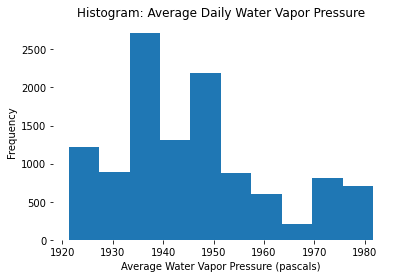

In [51]:
## Vapor Pressure
print("Avg Daily Vapor Pressure")
display(df_met.describe()['vp'])
# Histogram
fig, ax = plt.subplots()
df_met["vp"].plot(kind = "hist")
ax.set_title("Histogram: Average Daily Water Vapor Pressure")
ax.set_xlabel("Average Water Vapor Pressure (pascals)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)